In [1032]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import statistics
import math
import csv


In [1033]:
# # Task 1: Association Analysis
# Select a table (Primary) to perform the Association Analysis
WS = pd.read_csv("Primary.csv")
WS = WS.rename(columns={'Residence':'Rural', 
                        'Unnamed: 7':'Urban',
                        'Wealth quintile':'Poorest', 
                        'Unnamed: 9': "Richest",
                        'Unnamed: 11':'Times period'})
WS = WS.dropna(subset=["Region", "Rural", "Urban", "Poorest", "Richest"]) # removing the columns that has an NAN
WS = WS.drop(WS[(WS['Times period'] > "2022")].index) # removing any unrealiable datas that has year > 2022
WS.reset_index(drop=True, inplace=True)
WS = WS.head(50) # getting the first 50 values

In [1034]:
# Remove the % sign
WS['Total'] = list(map(lambda x: x[:-1], WS['Total'].values))
WS['Rural'] = list(map(lambda x: x[:-1], WS['Rural'].values))
WS['Urban'] = list(map(lambda x: x[:-1], WS['Urban'].values))
WS['Poorest'] = list(map(lambda x: x[:-1], WS['Poorest'].values))
WS['Richest'] = list(map(lambda x: x[:-1], WS['Richest'].values))

In [1035]:
# Change the data to integers instead of strings
WS['Total'] = [int(x) for x in WS['Total'].values]
WS['Rural'] = [int(x) for x in WS['Rural'].values]
WS['Urban'] = [int(x) for x in WS['Urban'].values]
WS['Poorest'] = [int(x) for x in WS['Poorest'].values]
WS['Richest'] = [int(x) for x in WS['Total'].values]
# print(WS)


In [1036]:
# Change continuous value "Times period" to discrete. 
# To do this we thake the first 4 values of the year, so instead of 2015-16
# We have 2015.
WS['Times period'] = list(map(lambda x: x[:4], WS['Times period'].values)) # only take the first 4 values of the value
WS['Times period'] = [int(x) for x in WS['Times period'].values]
WS_copy = WS.copy(deep=True)

In [1037]:
# We do not need to discretizate ISO3 and Countries and Areas since they are all unique.
# Drop Source since it brings no does not bring any significants to the data for the 
# percentage of students with internet in an region
# We also Drop 'Sub-region' since there is already 'Region'
WS_copy = WS_copy.drop(columns=['ISO3','Countries and areas', 'Source'])
WS_copy.to_csv('./216396764-216426744-T1Old.csv') # Save data to csv
WS_copy.head()
# Use TransactionEncoder() to 

,Region,Sub-region,Income Group,Total,Rural,Urban,Poorest,Richest,Times period
0,SSA,ESA,Lower middle income (LM),15,2,22,0,15,2015
1,ECA,EECA,Upper middle income (UM),81,69,89,46,81,2015
2,SA,SA,Lower middle income (LM),34,30,49,7,34,2019
3,LAC,LAC,High income (H),63,54,68,9,63,2012
4,SSA,WCA,Low income (L),3,1,6,0,3,2017


In [1038]:
from mlxtend.preprocessing import TransactionEncoder


In [1039]:
pd.cut(WS['Total'],3)

0     (-0.095, 31.667]
1       (63.333, 95.0]
2     (31.667, 63.333]
3     (31.667, 63.333]
4     (-0.095, 31.667]
5     (31.667, 63.333]
6       (63.333, 95.0]
7       (63.333, 95.0]
8     (-0.095, 31.667]
9     (-0.095, 31.667]
10    (-0.095, 31.667]
11    (-0.095, 31.667]
12      (63.333, 95.0]
13    (31.667, 63.333]
14      (63.333, 95.0]
15    (-0.095, 31.667]
16    (-0.095, 31.667]
17    (-0.095, 31.667]
18    (-0.095, 31.667]
19    (-0.095, 31.667]
20      (63.333, 95.0]
21      (63.333, 95.0]
22    (-0.095, 31.667]
23    (-0.095, 31.667]
24    (-0.095, 31.667]
25    (-0.095, 31.667]
26    (-0.095, 31.667]
27    (-0.095, 31.667]
28    (31.667, 63.333]
29      (63.333, 95.0]
30    (31.667, 63.333]
31    (31.667, 63.333]
32      (63.333, 95.0]
33    (-0.095, 31.667]
34    (-0.095, 31.667]
35    (-0.095, 31.667]
36      (63.333, 95.0]
37    (-0.095, 31.667]
38    (-0.095, 31.667]
39    (31.667, 63.333]
40      (63.333, 95.0]
41    (-0.095, 31.667]
42    (-0.095, 31.667]
43    (-0.0

In [1040]:
pd.cut(WS['Rural'],3)

0     (-0.094, 31.333]
1       (62.667, 94.0]
2     (-0.094, 31.333]
3     (31.333, 62.667]
4     (-0.094, 31.333]
5     (31.333, 62.667]
6     (31.333, 62.667]
7       (62.667, 94.0]
8     (-0.094, 31.333]
9     (-0.094, 31.333]
10    (-0.094, 31.333]
11    (-0.094, 31.333]
12      (62.667, 94.0]
13    (-0.094, 31.333]
14    (31.333, 62.667]
15    (-0.094, 31.333]
16    (-0.094, 31.333]
17    (-0.094, 31.333]
18    (-0.094, 31.333]
19    (-0.094, 31.333]
20    (31.333, 62.667]
21      (62.667, 94.0]
22    (-0.094, 31.333]
23    (-0.094, 31.333]
24    (-0.094, 31.333]
25    (-0.094, 31.333]
26    (-0.094, 31.333]
27    (-0.094, 31.333]
28    (31.333, 62.667]
29      (62.667, 94.0]
30    (31.333, 62.667]
31    (31.333, 62.667]
32      (62.667, 94.0]
33    (-0.094, 31.333]
34    (-0.094, 31.333]
35    (-0.094, 31.333]
36      (62.667, 94.0]
37    (-0.094, 31.333]
38    (-0.094, 31.333]
39    (-0.094, 31.333]
40      (62.667, 94.0]
41    (-0.094, 31.333]
42    (-0.094, 31.333]
43    (-0.0

In [1041]:
pd.cut(WS['Urban'],3)

0      (0.905, 32.667]
1       (64.333, 96.0]
2     (32.667, 64.333]
3       (64.333, 96.0]
4      (0.905, 32.667]
5       (64.333, 96.0]
6       (64.333, 96.0]
7       (64.333, 96.0]
8      (0.905, 32.667]
9      (0.905, 32.667]
10     (0.905, 32.667]
11     (0.905, 32.667]
12      (64.333, 96.0]
13    (32.667, 64.333]
14      (64.333, 96.0]
15     (0.905, 32.667]
16     (0.905, 32.667]
17     (0.905, 32.667]
18     (0.905, 32.667]
19     (0.905, 32.667]
20      (64.333, 96.0]
21      (64.333, 96.0]
22     (0.905, 32.667]
23     (0.905, 32.667]
24     (0.905, 32.667]
25    (32.667, 64.333]
26     (0.905, 32.667]
27     (0.905, 32.667]
28    (32.667, 64.333]
29      (64.333, 96.0]
30    (32.667, 64.333]
31      (64.333, 96.0]
32      (64.333, 96.0]
33     (0.905, 32.667]
34    (32.667, 64.333]
35     (0.905, 32.667]
36      (64.333, 96.0]
37     (0.905, 32.667]
38     (0.905, 32.667]
39    (32.667, 64.333]
40      (64.333, 96.0]
41     (0.905, 32.667]
42     (0.905, 32.667]
43    (32.6

In [1042]:
pd.cut(WS['Poorest'],3)

0     (-0.086, 28.667]
1     (28.667, 57.333]
2     (-0.086, 28.667]
3     (-0.086, 28.667]
4     (-0.086, 28.667]
5     (-0.086, 28.667]
6       (57.333, 86.0]
7     (-0.086, 28.667]
8     (-0.086, 28.667]
9     (-0.086, 28.667]
10    (-0.086, 28.667]
11    (-0.086, 28.667]
12      (57.333, 86.0]
13    (-0.086, 28.667]
14    (28.667, 57.333]
15    (-0.086, 28.667]
16    (-0.086, 28.667]
17    (-0.086, 28.667]
18    (-0.086, 28.667]
19    (-0.086, 28.667]
20    (-0.086, 28.667]
21    (28.667, 57.333]
22    (-0.086, 28.667]
23    (-0.086, 28.667]
24    (-0.086, 28.667]
25    (-0.086, 28.667]
26    (-0.086, 28.667]
27    (-0.086, 28.667]
28    (-0.086, 28.667]
29      (57.333, 86.0]
30    (-0.086, 28.667]
31    (-0.086, 28.667]
32    (28.667, 57.333]
33    (-0.086, 28.667]
34    (-0.086, 28.667]
35    (-0.086, 28.667]
36    (28.667, 57.333]
37    (-0.086, 28.667]
38    (-0.086, 28.667]
39    (-0.086, 28.667]
40    (28.667, 57.333]
41    (-0.086, 28.667]
42    (-0.086, 28.667]
43    (-0.0

In [1043]:
pd.qcut(WS['Times period'], 3)

0     (2009.999, 2015.0]
1     (2009.999, 2015.0]
2       (2018.0, 2019.0]
3     (2009.999, 2015.0]
4       (2015.0, 2018.0]
5     (2009.999, 2015.0]
6       (2015.0, 2018.0]
7     (2009.999, 2015.0]
8     (2009.999, 2015.0]
9     (2009.999, 2015.0]
10      (2015.0, 2018.0]
11      (2018.0, 2019.0]
12      (2015.0, 2018.0]
13    (2009.999, 2015.0]
14      (2015.0, 2018.0]
15      (2015.0, 2018.0]
16      (2018.0, 2019.0]
17      (2015.0, 2018.0]
18    (2009.999, 2015.0]
19    (2009.999, 2015.0]
20      (2015.0, 2018.0]
21      (2015.0, 2018.0]
22      (2015.0, 2018.0]
23    (2009.999, 2015.0]
24      (2015.0, 2018.0]
25      (2015.0, 2018.0]
26    (2009.999, 2015.0]
27      (2018.0, 2019.0]
28      (2015.0, 2018.0]
29      (2015.0, 2018.0]
30      (2015.0, 2018.0]
31      (2015.0, 2018.0]
32      (2015.0, 2018.0]
33      (2015.0, 2018.0]
34      (2015.0, 2018.0]
35      (2015.0, 2018.0]
36      (2015.0, 2018.0]
37    (2009.999, 2015.0]
38    (2009.999, 2015.0]
39      (2015.0, 2018.0]


In [1044]:
WS_copy['Total'] = pd.cut(WS['Total'],3,labels=["Total(%): (-0.095, 31.667]", "Total(%): (31.667, 63.333]", "Total(%): (63.333, 95.0]"])
WS_copy['Rural'] = pd.cut(WS['Rural'],3,labels=["Rural(%): (-0.094, 31.333]", "Rural(%): (31.333, 62.667]", "Rural(%): (62.667, 94.0]"])
WS_copy['Urban'] = pd.cut(WS['Urban'],3,labels=["Urban(%): (0.905, 32.667]", "Urban(%): (32.667, 64.333]", "Urban(%): (64.333, 96.0]"])
WS_copy['Poorest'] = pd.cut(WS['Poorest'],3,labels=["Poorest(%): (-0.086, 28.667]", "Poorest(%): (28.667, 57.333]", "Poorest(%): (57.333, 86.0]"])
WS_copy['Richest'] = pd.cut(WS['Richest'],3,labels=["Richest(%): (-0.095, 31.667]", "Richest(%): (31.667, 63.333]", "Richest(%):(63.333, 95.0]"])
WS_copy['Times period'] = pd.qcut(WS['Times period'], 3, labels=["Times period: (2010, 2015]", "Times period: (2015, 2018]","Times period: (2018, 2019]"])


In [1045]:
# Discretize the table to (50, 28)
region = np.array(WS_copy["Region"])
region = np.reshape(region, (len(WS),1))

subregion = np.array(WS_copy["Sub-region"])
subregion = np.reshape(subregion, (len(WS),1))

income = np.array(WS_copy["Income Group"])
income = np.reshape(income, (len(WS),1))

rural = np.array(WS_copy["Rural"])
rural = np.reshape(rural, (len(WS),1))

urban = np.array(WS_copy["Urban"])
urban = np.reshape(urban, (len(WS),1))

poorest = np.array(WS_copy["Poorest"])
poorest = np.reshape(poorest, (len(WS),1))

richest = np.array(WS_copy["Richest"])
richest = np.reshape(richest, (len(WS),1))

time = np.array(WS_copy["Times period"])
time = np.reshape(time, (len(WS),1))

matrix = pd.DataFrame()


In [1046]:
te = TransactionEncoder()
te_ary = te.fit(region).transform(region)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [1047]:
te_ary = te.fit(subregion).transform(subregion)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA
0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1


In [1048]:
te_ary = te.fit(income).transform(income)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM)
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [1049]:
te_ary = te.fit(rural).transform(rural)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,MENA,SA,WCA,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM),"Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]"
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [1050]:
te_ary = te.fit(urban).transform(urban)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,High income (H),Low income (L),Lower middle income (LM),Upper middle income (UM),"Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [1051]:
te_ary = te.fit(poorest).transform(poorest)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,Upper middle income (UM),"Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [1052]:
te_ary = te.fit(richest).transform(richest)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Rural(%): (62.667, 94.0]","Urban(%): (0.905, 32.667]","Urban(%): (32.667, 64.333]","Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [1053]:
te_ary = te.fit(time).transform(time)
T1Disc = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
matrix = pd.concat([matrix, T1Disc], axis=1)
matrix.head()

,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]","Times period: (2010, 2015]","Times period: (2015, 2018]","Times period: (2018, 2019]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [1054]:
matrix.to_csv('./216396764-216426744-T1Disc.csv') # Save data to csv
matrix.head()


,EAP,ECA,LAC,MENA,SA,SSA,EAP,EECA,ESA,LAC,...,"Urban(%): (64.333, 96.0]","Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]","Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]","Times period: (2010, 2015]","Times period: (2015, 2018]","Times period: (2018, 2019]"
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [1055]:
# Find the 10 most frequent item sets. 
# The length/size of these item sets must be at least 2.
# Use the apriori library from https://github.com/ymoch/apyori/blob/master/apyori.py
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


In [1056]:
# use apriori to find the support for each item set with a minimum support = 0.55
frequent_itemsets = apriori(matrix, min_support=0.55, use_colnames=True)
frequent_itemsets

/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.62,"(Rural(%): (-0.094, 31.333])"
1,0.78,"(Poorest(%): (-0.086, 28.667])"
2,0.56,"(Richest(%): (-0.095, 31.667])"
3,0.62,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0..."
4,0.56,"(Richest(%): (-0.095, 31.667], Rural(%): (-0.0..."
5,0.56,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0..."
6,0.56,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0..."


In [1057]:
# We then choose 10 frequent item-set that has atleast 2 item-sets
X = frequent_itemsets[frequent_itemsets['itemsets'].map(len) > 1]
X = X.head(10)
X.reset_index(drop=True, inplace=True)
X.to_csv("./frequent_items.csv")

In [1058]:
# Determine the rules and the confidence of the rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence")
rules.to_csv("./rules.csv")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667])",0.62,0.78,0.62,1.000000,1.282051,0.1364,inf
1,"(Richest(%): (-0.095, 31.667])","(Rural(%): (-0.094, 31.333])",0.56,0.62,0.56,1.000000,1.612903,0.2128,inf
2,"(Rural(%): (-0.094, 31.333])","(Richest(%): (-0.095, 31.667])",0.62,0.56,0.56,0.903226,1.612903,0.2128,4.546667
3,"(Richest(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667])",0.56,0.78,0.56,1.000000,1.282051,0.1232,inf
4,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0...","(Rural(%): (-0.094, 31.333])",0.56,0.62,0.56,1.000000,1.612903,0.2128,inf


In [1059]:
rules = rules[["antecedents","consequents","support","confidence","lift"]]

In [1060]:
rules.sort_values(by=["confidence"])

,antecedents,consequents,support,confidence,lift
2,"(Rural(%): (-0.094, 31.333])","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
5,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
8,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667], Richest(%): (-0...",0.56,0.903226,1.612903
0,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667])",0.62,1.000000,1.282051
1,"(Richest(%): (-0.095, 31.667])","(Rural(%): (-0.094, 31.333])",0.56,1.000000,1.612903
3,"(Richest(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667])",0.56,1.000000,1.282051
4,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0...","(Rural(%): (-0.094, 31.333])",0.56,1.000000,1.612903
6,"(Richest(%): (-0.095, 31.667], Rural(%): (-0.0...","(Poorest(%): (-0.086, 28.667])",0.56,1.000000,1.282051
7,"(Richest(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...",0.56,1.000000,1.612903


In [1061]:
least = rules.drop(rules[(rules['confidence'] == 1)].index)
least = least.head(5)
least.to_csv('./least_confidence.csv')
least

,antecedents,consequents,support,confidence,lift
2,"(Rural(%): (-0.094, 31.333])","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
5,"(Poorest(%): (-0.086, 28.667], Rural(%): (-0.0...","(Richest(%): (-0.095, 31.667])",0.56,0.903226,1.612903
8,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667], Richest(%): (-0...",0.56,0.903226,1.612903


In [1062]:
most = rules.drop(rules[(rules['confidence'] < 1)].index)
most = most.head(5)
most.to_csv('./most_confidence.csv')
most

,antecedents,consequents,support,confidence,lift
0,"(Rural(%): (-0.094, 31.333])","(Poorest(%): (-0.086, 28.667])",0.62,1.0,1.282051
1,"(Richest(%): (-0.095, 31.667])","(Rural(%): (-0.094, 31.333])",0.56,1.0,1.612903
3,"(Richest(%): (-0.095, 31.667])","(Poorest(%): (-0.086, 28.667])",0.56,1.0,1.282051
4,"(Poorest(%): (-0.086, 28.667], Richest(%): (-0...","(Rural(%): (-0.094, 31.333])",0.56,1.0,1.612903
6,"(Richest(%): (-0.095, 31.667], Rural(%): (-0.0...","(Poorest(%): (-0.086, 28.667])",0.56,1.0,1.282051


In [1063]:
data_crosstab = pd.crosstab(WS_copy['Richest'],
                            WS_copy['Poorest'], 
                               margins = True)
data_crosstab


Poorest,"Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]",All
Richest,,,,
"Richest(%): (-0.095, 31.667]",28,0,0,28
"Richest(%): (31.667, 63.333]",9,0,0,9
"Richest(%):(63.333, 95.0]",2,6,5,13
All,39,6,5,50


In [1064]:
data_crosstab = pd.crosstab(WS_copy['Rural'],
                            WS_copy['Poorest'], 
                               margins = True)
data_crosstab

Poorest,"Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]",All
Rural,,,,
"Rural(%): (-0.094, 31.333]",31,0,0,31
"Rural(%): (31.333, 62.667]",7,1,1,9
"Rural(%): (62.667, 94.0]",1,5,4,10
All,39,6,5,50


In [1065]:
# 5 other measurements for the 5 of the rules. The association rule has already calcuated the lift. 
# frequency = support * len(WS)
data_crosstab = pd.crosstab(WS_copy['Total'],
                            WS_copy['Poorest'], 
                               margins = True)
data_crosstab

Poorest,"Poorest(%): (-0.086, 28.667]","Poorest(%): (28.667, 57.333]","Poorest(%): (57.333, 86.0]",All
Total,,,,
"Total(%): (-0.095, 31.667]",28,0,0,28
"Total(%): (31.667, 63.333]",9,0,0,9
"Total(%): (63.333, 95.0]",2,6,5,13
All,39,6,5,50


In [1066]:
data_crosstab = pd.crosstab(WS_copy['Richest'],
                            WS_copy['Rural'], 
                               margins = True)
data_crosstab

Rural,"Rural(%): (-0.094, 31.333]","Rural(%): (31.333, 62.667]","Rural(%): (62.667, 94.0]",All
Richest,,,,
"Richest(%): (-0.095, 31.667]",28,0,0,28
"Richest(%): (31.667, 63.333]",3,6,0,9
"Richest(%):(63.333, 95.0]",0,3,10,13
All,31,9,10,50


In [1067]:
data_crosstab = pd.crosstab(WS_copy['Total'],
                            WS_copy['Richest'], 
                               margins = True)
data_crosstab

Richest,"Richest(%): (-0.095, 31.667]","Richest(%): (31.667, 63.333]","Richest(%):(63.333, 95.0]",All
Total,,,,
"Total(%): (-0.095, 31.667]",28,0,0,28
"Total(%): (31.667, 63.333]",0,9,0,9
"Total(%): (63.333, 95.0]",0,0,13,13
All,28,9,13,50


In [1068]:
# Task 2
# Choosing data to perform clustering: Primary.csv
# 

WS2_copy = WS.copy(deep=True)
WS2_copy = WS2_copy[["Income Group", "Total"]]
WS2_copy.to_csv("./216396764-216426744-T2Org.csv") # Before Preprocessing 
WS2_copy.head()


,Income Group,Total
0,Lower middle income (LM),15
1,Upper middle income (UM),81
2,Lower middle income (LM),34
3,High income (H),63
4,Low income (L),3


In [1069]:
# After Preprocessing
# Note that Income Group is a string value and cannot be processed as a vectored form
# Since Income Group is Ordinal, we are able to allocate a number to the certain data
# Low Income = 0, Lower middle income = 1, Upper middle income = 2, High income = 3.
# First find all the unique values for income group
WS2_copy.loc[WS["Income Group"] == "Low income (L)", "Income Group"] = 0
WS2_copy.loc[WS["Income Group"] == "Lower middle income (LM)", "Income Group"] = 1
WS2_copy.loc[WS["Income Group"] == "Upper middle income (UM)", "Income Group"] = 2
WS2_copy.loc[WS["Income Group"] == "High income (H)", "Income Group"] = 3

WS2_copy.head()


,Income Group,Total
0,1,15
1,2,81
2,1,34
3,3,63
4,0,3


In [1070]:
# New data
WS2_copy.to_csv("./216396764-216426744-T2Mod.csv") # After Preprocessing 


In [1071]:
from sklearn.cluster import KMeans # using the sklearn.cluster and import KMeans


In [1072]:
kmeans = KMeans(n_clusters=3).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()

,Income Group,Total,class
0,1,15,0
1,2,81,1
2,1,34,2
3,3,63,1
4,0,3,0


Text(0, 0.5, 'Total (%)')

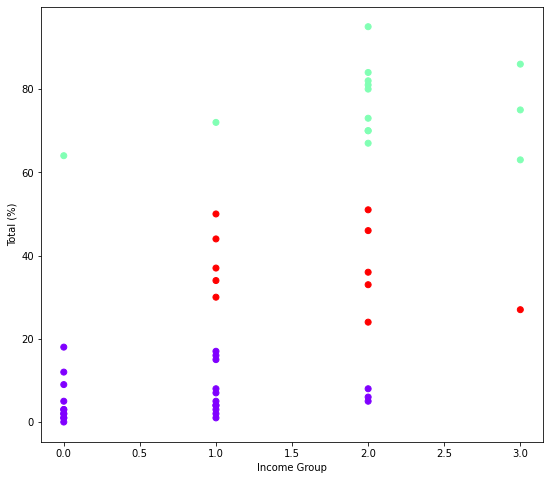

In [1073]:
figure(num=None, figsize=(9,8), facecolor='w', edgecolor='r')
plt.scatter(WS2_copy['Income Group'], WS2_copy['Total'],c=WS2_copy['class'], cmap='rainbow')
plt.xlabel("Income Group")
plt.ylabel("Total (%)")


In [1074]:
print(kmeans.inertia_) # Sum of Square error for k = 3

2649.4670129870133


In [1075]:
kmeans = KMeans(n_clusters=4).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()

,Income Group,Total,class
0,1,15,1
1,2,81,3
2,1,34,2
3,3,63,0
4,0,3,1


Text(0, 0.5, 'Total (%)')

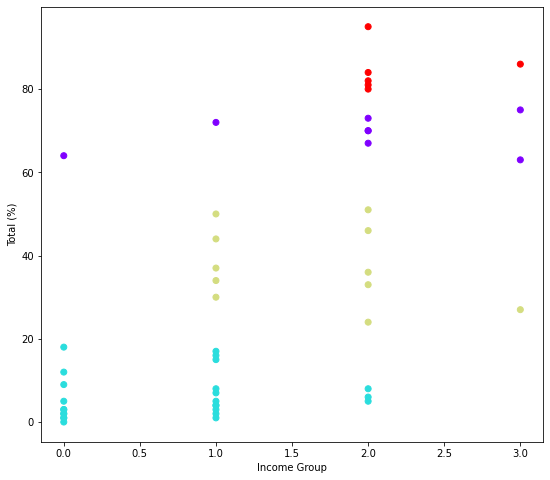

In [1076]:
figure(num=None, figsize=(9,8), facecolor='w', edgecolor='r')
plt.scatter(WS2_copy['Income Group'], WS2_copy['Total'],c=WS2_copy['class'], cmap='rainbow')
plt.xlabel("Income Group")
plt.ylabel("Total (%)")

In [1077]:
print(kmeans.inertia_) # Sum of Square error for k = 4

1834.294393939394


In [1078]:
kmeans = KMeans(n_clusters=5).fit(WS2_copy)
id_clusters = kmeans.fit_predict(WS2_copy)
WS2_copy["class"] = id_clusters
WS2_copy.head()
WS2_copy.to_csv("./216396764-216426744-T2Class.csv")

Text(0, 0.5, 'Total (%)')

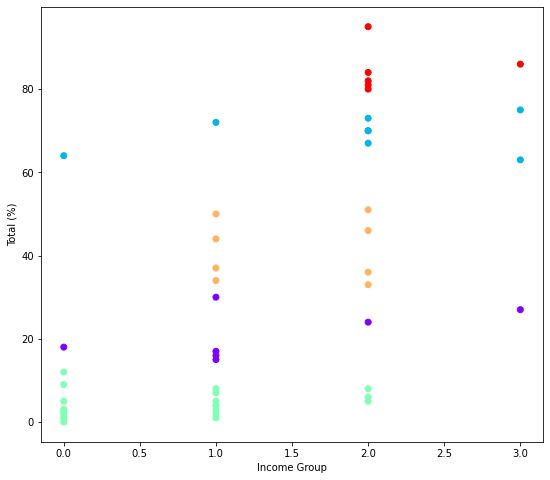

In [1079]:
figure(num=None, figsize=(9,8), facecolor='w', edgecolor='r')
plt.scatter(WS2_copy['Income Group'], WS2_copy['Total'],c=WS2_copy['class'], cmap='rainbow')
plt.xlabel("Income Group")
plt.ylabel("Total (%)")


In [1080]:
print(kmeans.inertia_) # Sum of Square error for k = 5


1078.892857142857


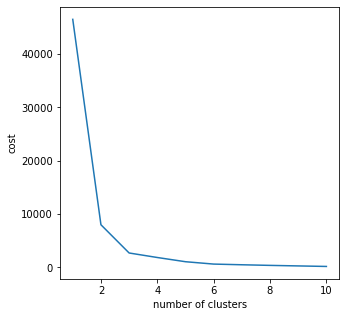

In [1081]:
figure(num=None, figsize=(5,5), facecolor='w', edgecolor='r')
wcss = []
for i in range(1,11): # calculating all the SSE for i = 1 - 11
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(WS2_copy)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel("number of clusters")
plt.ylabel("cost")
plt.savefig("cost.png")
plt.show()


In [1082]:
# Task 3
# Create the Naive Bayes classifier. We import naive_bayes
# First need to use 3 folds to separate the data from Task 2
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
WS2_copy.head()

,Income Group,Total,class
0,1,15,0
1,2,81,4
2,1,34,3
3,3,63,1
4,0,3,2


In [1083]:
# Naive Bayes for the Training and accuracy check using Testing
# Training AB Testing C
# Training AC Testing B
# Training BC Testing A
X = np.array(WS2_copy[["Income Group", "Total"]])
y = np.array(WS2_copy[["class"]])
# print(X)
kf = KFold(n_splits= 3, shuffle=True, random_state=1)
for train, test in kf.split(X):
	X_train, X_test = X[train], X[test]
	y_train, y_test = y[train], y[test]

In [1084]:

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
# prepare cross validation
kfold = KFold(n_splits= 3, shuffle=True, random_state=1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (train, test))

train: [1 2], test: [0]
train: [0 1], test: [2]
train: [0 2], test: [1]
